# Import & Load Dataset

In [1]:
# Install Module
!pip install --upgrade pythainlp
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.
numba 0.56.4 requires numpy

In [2]:
!pip uninstall numpy

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.25.2


In [3]:
!pip install numpy==1.22.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 59.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.22.4 which is incompatible.


In [4]:
import pandas as pd
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
#Read Data
df = pd.read_csv('OasisCoffeeRangnam.csv')

#Exploratory Data Analysis

In [6]:
df.head()

,Review ID,Review
0,1,เป็นร้านที่ส่วนมากจะเจอนักท่องเที่ยวลากกระเป๋า...
1,2,ก่อนหน้านี้ได้มีโอกาสไปที่ OASIS COFFEE สาขาห้...
2,3,คาเฟ่ดีที่ซอยรางน้ำ ติดกับ Century The Movie P...
3,4,เป็นคาเฟ่ที่เหล่าผู้คนเน้นมานั่งทำงานค่ะ บรรยา...
4,5,มากันที่ซ.รางน้ำ ร้านนี้ไม่ไกล อยู่หลัง centur...


In [7]:
df.tail()

,Review ID,Review
15,16,ร้านกว้าง มี2ชั้น มีห้องน้ำ กาแฟดี
16,17,บรรยากาศในร้านสบายๆ กาแฟดี
17,18,สำหรับคอกาแฟรักสุขภาพ
18,19,มีที่นั่งเยอะ มีปลั๊กให้ ขนมในตู้มีเยอะ น่ากิน...
19,20,ร้านกาแฟสุดหรูในซอยรางน้ำ คนเยอะมากค่ะ บรรยากา...


#Tokenize Words

In [84]:
import pythainlp
import re

stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = ['ซอย','','\u200b','\n', '         ', '     ', '   ', '', 'เมนู', 'รี่', 'จู', 'เซน', 'ผม', 'bts', '/', ' ', '  ', 'ซ.', 'อนุสาวรีย์ชัยสมรภูมิ', 'อนุสาวรีย์', 'รางน้ำ', 'คิงพาวเวอร์', 'ห้าง', 'เซนจูรี่', 'OASIS', 'COFFEE', 'Century', 'century', 'The', 'Movie', 'Plaza', 'ก่อนหน้านี้ได้มีโอกาสไปที่', 'สาขา', 'ห้วยขวาง', 'คาเฟ่', 'ร้าน', 'ค่าาา', 'ค่า', 'เลย', 'ค่ะ', 'นะคะ', 'นะค่ะ', 'ครัช', 'จั๊ฟ', 'รส', 'รสชาติ', 'กิน', 'ดื่ม', 'ทาน', 'นๆ', 'น', 'กก', 'ดดด', 'ครับ', '(', ')', '/', '+', '.', '1', '2', '3', '4', '5', '6', '7', '8', '9', '55']
screening_words = stopwords + removed_words

def tokenize_with_space(sentence):
    merged = ' '
    words = pythainlp.word_tokenize(str(sentence), engine='newmm')
    for word in words:
        # Remove English words using regular expression
        if not re.match("^[A-Za-z]*$", word):
            if word not in screening_words:
                merged = merged + ',' + word
    return merged[1:]

In [85]:
df['Review_tokenized'] = df['Review'].apply(lambda x: tokenize_with_space(x))

In [86]:
df.head()

,Review ID,Review,Review_tokenized,topics,score
0,1,เป็นร้านที่ส่วนมากจะเจอนักท่องเที่ยวลากกระเป๋า...,",เจอ,นักท่องเที่ยว,ลาก,กระเป๋า,แวะ,เครื่องดื่ม...",2,0.997749
1,2,ก่อนหน้านี้ได้มีโอกาสไปที่ OASIS COFFEE สาขาห้...,",มีโอกาส,ประทับใจ,ลอง,เพื่อน,นัด,เจอ,เสนอ,เรื่...",0,0.998792
2,3,คาเฟ่ดีที่ซอยรางน้ำ ติดกับ Century The Movie P...,",ดี,ติดกับ,บรรยากาศ,ฟิล,หลบหนี,ความวุ่นวาย,เหม...",2,0.998042
3,4,เป็นคาเฟ่ที่เหล่าผู้คนเน้นมานั่งทำงานค่ะ บรรยา...,",ผู้คน,นั่ง,ทำงาน,บรรยากาศ,คน,เงียบ,ไร้,มลภาวะ...",0,0.996621
4,5,มากันที่ซ.รางน้ำ ร้านนี้ไม่ไกล อยู่หลัง centur...,",กันที่,บรรยากาศ,แนว,สตาร์,บัค,น้ำส้ม,สดชื่น,ห...",0,0.997041


In [87]:
df.tail()

,Review ID,Review,Review_tokenized,topics,score
15,16,ร้านกว้าง มี2ชั้น มีห้องน้ำ กาแฟดี,",ชั้น,ห้องน้ำ,กาแฟ,ดี",0,0.986083
16,17,บรรยากาศในร้านสบายๆ กาแฟดี,",บรรยากาศ,กาแฟ,ดี",0,0.982715
17,18,สำหรับคอกาแฟรักสุขภาพ,",สำหรับ,คอ,กาแฟ,รัก,สุขภาพ",0,0.988353
18,19,มีที่นั่งเยอะ มีปลั๊กให้ ขนมในตู้มีเยอะ น่ากิน...,",ที่นั่ง,ปลั๊ก,ขนม,ตู้,น่ากิน,ดี,น้ำ,ก้อ,กาแฟ,...",1,0.995852
19,20,ร้านกาแฟสุดหรูในซอยรางน้ำ คนเยอะมากค่ะ บรรยากา...,",ร้านกาแฟ,หรู,คน,บรรยากาศ,คน,ทำงาน,อ่านหนังสือ...",1,0.996017


#Create Dictionary

In [88]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)

In [89]:
print(dictionary.token2id.keys())

dict_keys(['', 'กระเป๋า', 'กลมกล่อม', 'กาแฟ', 'กำลังดี', 'ขนาด', 'ขาย', 'คิง', 'คุ้ม', 'ง.', 'จอด', 'ชั้น', 'ดี', 'ติดกับ', 'ต่างชาติ', 'ที่จอดรถ', 'นักท่องเที่ยว', 'พน', 'พาวเวอร์', 'รถ', 'ราคา', 'ลาก', 'ลาเต้', 'ลูกค้า', 'สัญชาติ', 'หลายครั้ง', 'หวาน', 'เครื่องดื่ม', 'เจอ', 'เซ็น', 'เดิน', 'เป็นหลัก', 'เยื้อง', 'แพง', 'แวะ', 'ใส่ใจ', 'ให้บริการ', '&', ';', 'กลิ่นอาย', 'ข้อดี', 'คน', 'คนต่างชาติ', 'คนไทย', 'คล้ายคลึง', 'คุย', 'จิบ', 'ชาร์จ', 'ชิ', 'ตะวันตก', 'ถนน', 'ทักทาย', 'ทำงาน', 'ที่นั่ง', 'ที่มา', 'นัด', 'นั่ง', 'บรรยากาศ', 'บริษัท', 'ประชุม', 'ประทับใจ', 'พื้น', 'มีโอกาส', 'ยังมี', 'ร่มรื่น', 'ลอง', 'ว', 'วิว', 'สวน', 'ส่งผล', 'หนัง', 'หน้า', 'ออฟฟิศ', 'เกร็ง', 'เงียบ', 'เบาะ', 'เพื่อน', 'เรื่อง', 'เสนอ', 'เหมือน', 'แทน', 'แนว', 'แบต', 'โซน', 'ให้เสียง', 'ไม้', 'ความตั้งใจ', 'ความวุ่นวาย', 'งาน', 'งีบ', 'นมสด', 'นอน', 'นัั่ง', 'นั่งร้าน', 'น้ำเปล่า', 'บริการ', 'ปริมาณ', 'ปลั๊ก', 'พัก', 'ฟรี', 'ฟิล', 'ร่าง', 'ร้านกาแฟ', 'สั่ง', 'หลบหนี', 'อร่อย', 'เข้ากับ', 'เข้ามา', 'เคลียร์', 

In [90]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

#Topic Modeling

In [91]:
num_topics = 20
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents #10
iterations = 50
eval_every = 1 # Don't evaluate model perplexity, takes too much time

# Make a index to word dictionary.
temp = dictionary[0] # This is only to "load" the dictionary
id2word = dictionary.id2token

%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

CPU times: user 401 ms, sys: 776 µs, total: 402 ms
Wall time: 415 ms


In [92]:
from gensim import models
n_topics = 3
model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations,passes=passes,eval_every=eval_every)
#model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics

In [93]:
pyLDAvis.gensim.prepare(model, gensim_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.080691 -0.045244       1        1  51.753147
2     -0.089094 -0.033545       2        1  37.044703
0      0.008403  0.078789       3        1  11.202150, topic_info=            Term      Freq      Total Category  logprob  loglift
52         ทำงาน  5.000000   5.000000  Default  30.0000  30.0000
41            คน  5.000000   5.000000  Default  29.0000  29.0000
45           คุย  2.000000   2.000000  Default  28.0000  28.0000
79        เหมือน  2.000000   2.000000  Default  27.0000  27.0000
157  อ่านหนังสือ  6.000000   6.000000  Default  26.0000  26.0000
..           ...       ...        ...      ...      ...      ...
53       ที่นั่ง  0.506416   5.334172   Topic3  -4.7623  -0.1655
3           กาแฟ  0.506412  10.615251   Topic3  -4.7623  -0.8536
81           แนว  0.506398   2.382227   Topic3  -4.7624   0.6406
63         ยังมี  0.506391   2.981831   Topic3  -4.7624   0.4161
57      บรรยากาศ  0.506380   6.072270   Topic3  -4.7624  -0.2951

[165 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.628159           
0         2  0.376896           
0         3  0.062816           
37        3  1.025110          &
38        3  1.025096          ;
...     ...       ...        ...
193       2  0.748774     ใช้ได้
35        2  0.790952      ใส่ใจ
36        2  0.790952  ให้บริการ
84        3  1.025102   ให้เสียง
85        3  1.025119        ไม้

[165 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [96]:
model.show_topic(0)

[('ทำงาน', 0.014956744),
 ('คุย', 0.014954279),
 ('ชั้น', 0.01495426),
 ('โซน', 0.014953955),
 ('เหมือน', 0.014953891),
 ('คน', 0.014952808),
 ('', 0.008548884),
 ('นั่ง', 0.008547536),
 ('ประชุม', 0.0085463775),
 ('นัด', 0.008546347)]

In [97]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [98]:
df

,Review ID,Review,Review_tokenized,topics,score
0,1,เป็นร้านที่ส่วนมากจะเจอนักท่องเที่ยวลากกระเป๋า...,",เจอ,นักท่องเที่ยว,ลาก,กระเป๋า,แวะ,เครื่องดื่ม...",2,0.997069
1,2,ก่อนหน้านี้ได้มีโอกาสไปที่ OASIS COFFEE สาขาห้...,",มีโอกาส,ประทับใจ,ลอง,เพื่อน,นัด,เจอ,เสนอ,เรื่...",0,0.997627
2,3,คาเฟ่ดีที่ซอยรางน้ำ ติดกับ Century The Movie P...,",ดี,ติดกับ,บรรยากาศ,ฟิล,หลบหนี,ความวุ่นวาย,เหม...",2,0.997401
3,4,เป็นคาเฟ่ที่เหล่าผู้คนเน้นมานั่งทำงานค่ะ บรรยา...,",ผู้คน,นั่ง,ทำงาน,บรรยากาศ,คน,เงียบ,ไร้,มลภาวะ...",1,0.996782
4,5,มากันที่ซ.รางน้ำ ร้านนี้ไม่ไกล อยู่หลัง centur...,",กันที่,บรรยากาศ,แนว,สตาร์,บัค,น้ำส้ม,สดชื่น,ห...",1,0.997182
5,6,ร้านอยู่ในซอยรางน้ำครับ พญาไท จอดรถริมถนนแถวหน...,",พญาไท,จอด,รถ,ริมถนน,แถวหน้า,จุด,พนีก,งาน,บริก...",2,0.994307
6,7,เครื่องดื่มร้านราคาไม่เบา แต่ 1 บิล นั่งได้ 4 ...,",เครื่องดื่ม,ราคา,ไม่เบา,บิล,นั่ง,ชม.,สั่ง,หวา...",1,0.996446
7,8,ให้ 5 ดาวไปเลย สำหรับนักอ่านหนังสือ นักทำรายงา...,",ดาว,สำหรับ,อ่านหนังสือ,นักทำ,รายงาน,ที่อยู่,แ...",1,0.998346
8,9,อยู่ในซอยรางน้ำ ใกล้ๆbts อนุสาวรีย์ มีสองชั้น ...,",สองชั้น,คน,นิยม,นั่ง,ชั้นสอง,เหมาะ,นั่ง,ติว,อ...",1,0.997815
9,10,ร้านกาแฟเยื้องคิงพาวเวอร์รางน้ำ ถ้าคุณมองหาร้า...,",ร้านกาแฟ,เยื้อง,คิง,พาวเวอร์,มองหา,นั่ง,รอ,เพ...",2,0.998211


#WordCloud

In [99]:
from wordcloud import WordCloud

In [100]:
from PIL import ImageFont

font_path = "TH Sarabun New Regular.ttf"
try:
    font = ImageFont.truetype(font_path, size=12)
except Exception as e:
    print("Font loading error:", e)

In [101]:
regexp = r"[ก-๙a-zA-Z']+"
long_string = ','.join(list(df['Review_tokenized'].values))
#wordcloud = WordCloud(font_path = gdrive_path + 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000,regexp="[ก-๙a-zA-Z']+")
wordcloud = WordCloud(font_path = 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000, regexp=r"[ก-๙a-zA-Z']+")
wordcloud.generate(long_string)

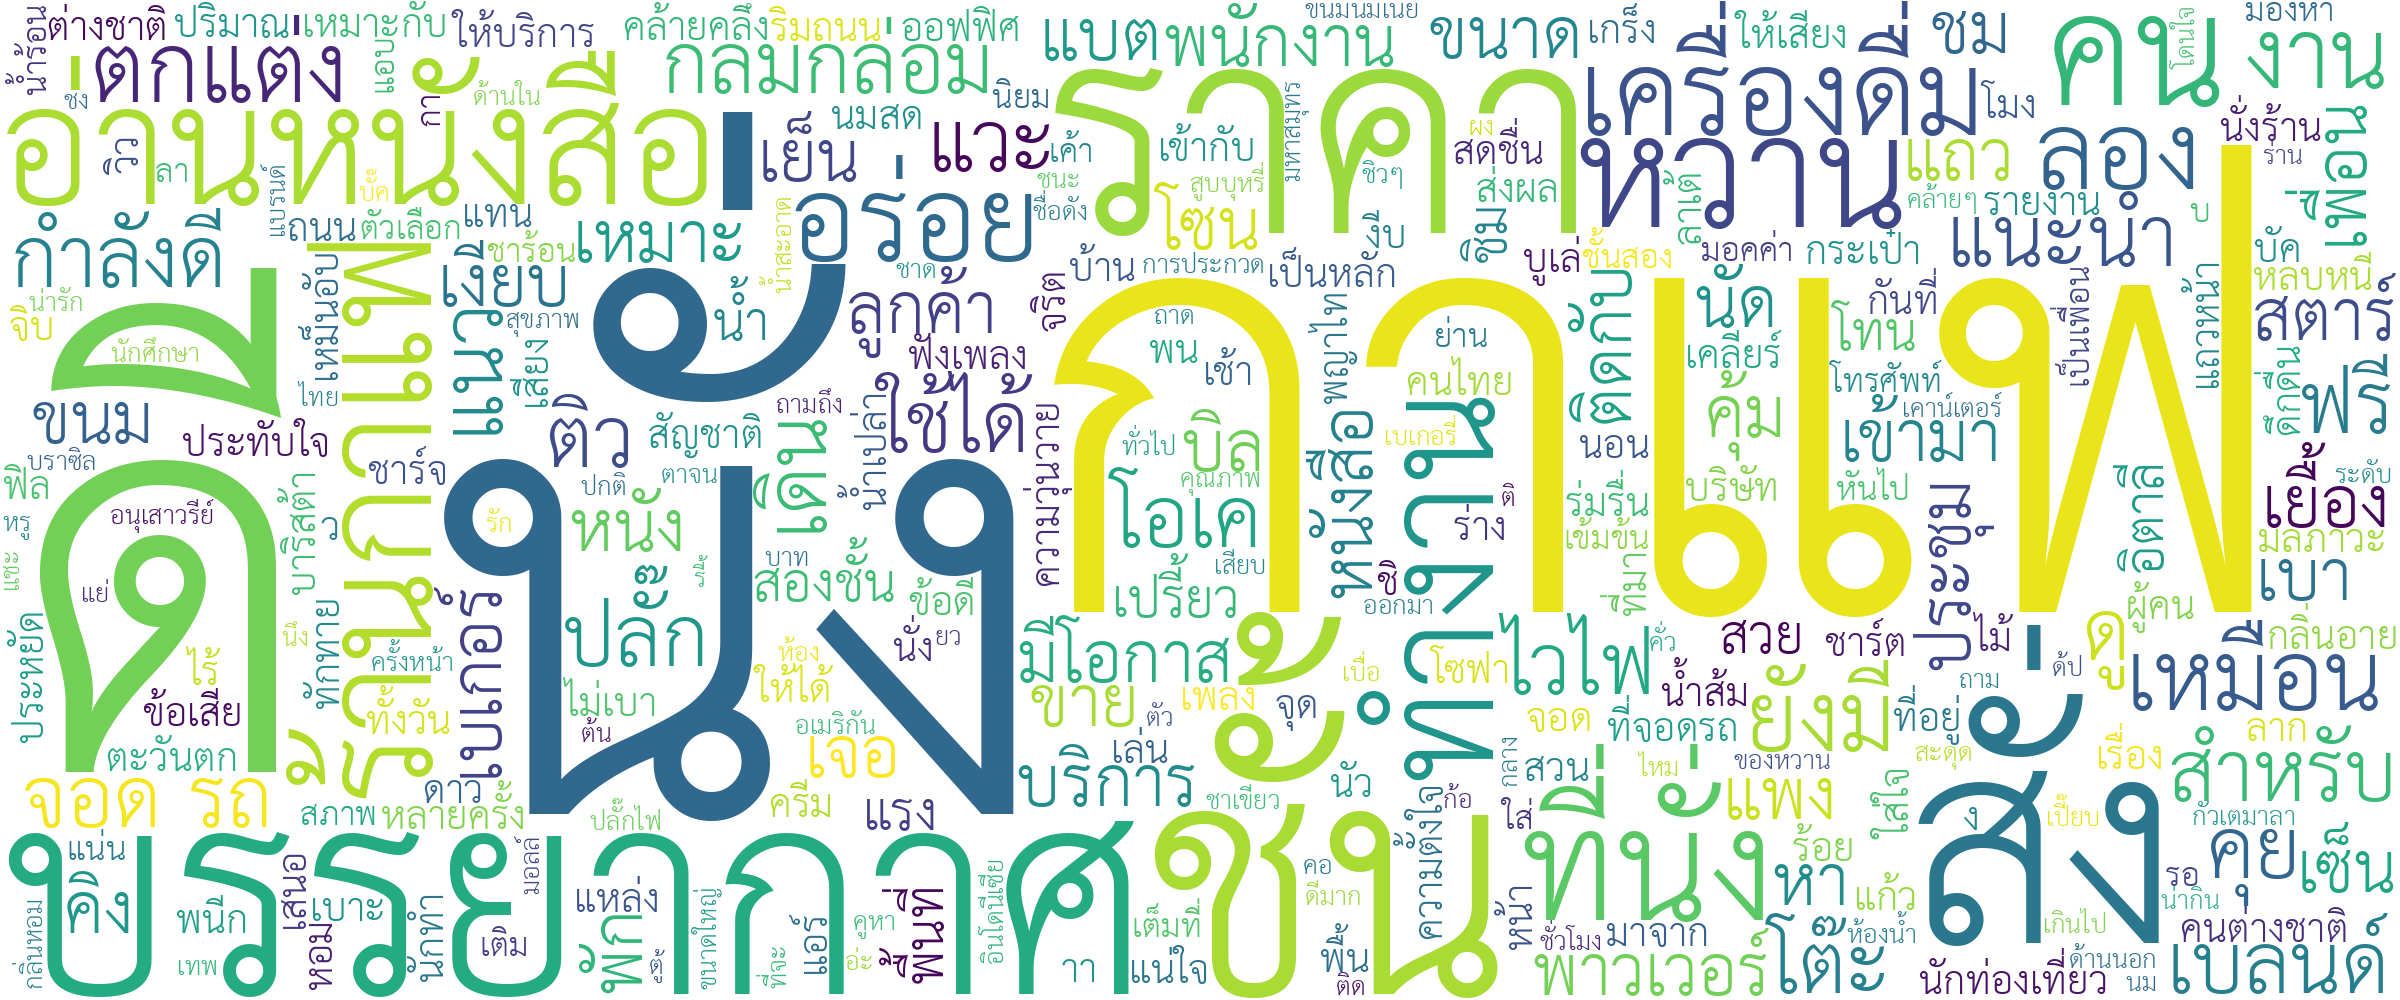

In [102]:
wordcloud.to_image()